In [18]:
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

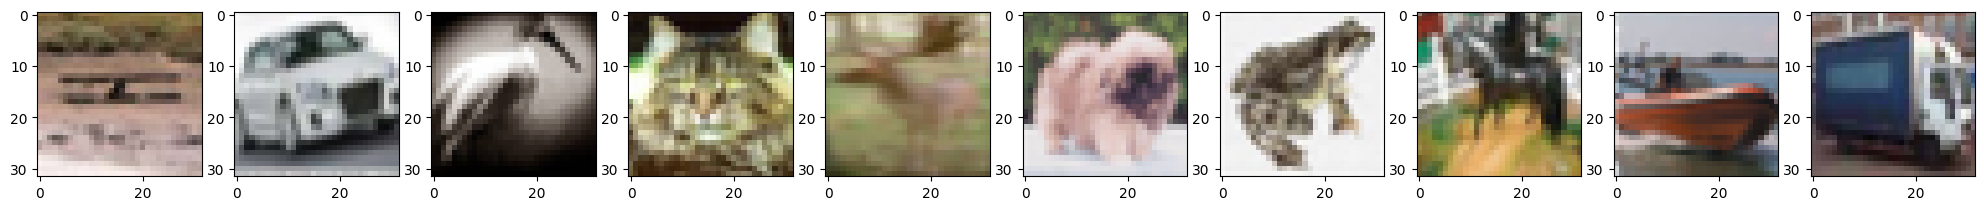

In [26]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_indexes = np.where(y_train==i)[0]
    index = random.choice(label_indexes)
    img = x_train[index]
    axs[i].imshow(Image.fromarray(img))
plt.show()

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)
(10000, 1)


In [29]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(40000, 10)
(10000, 10)
(10000, 10)


In [35]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [36]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/kirill/Документы/Project/Cifar-10/venv/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


/home/kirill/Документы/Project/Cifar-10/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.4044 - loss: 1.6153 - val_accuracy: 0.4044 - val_loss: 1.7241
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.5460 - loss: 1.2616 - val_accuracy: 0.6053 - val_loss: 1.1248
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6046 - loss: 1.1109 - val_accuracy: 0.6102 - val_loss: 1.1309
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.6428 - loss: 1.0070 - val_accuracy: 0.6893 - val_loss: 0.8804
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6738 - loss: 0.9350 - val_accuracy: 0.6928 - val_loss: 0.8680
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6924 - loss: 0.8777 - val_accuracy: 0.7276 - val_loss: 0.7730
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.7067 - loss: 0.8387 - val_accuracy: 0.7487 - val_loss: 0.7414
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.7189 - loss: 0.7988 - val_accurac

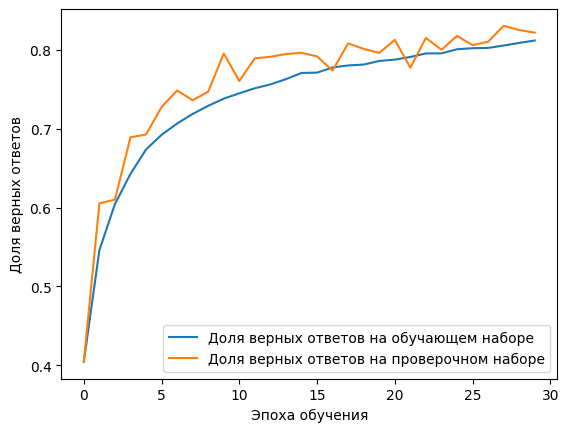

In [37]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                   epochs=30,
                   validation_data=(x_val, y_val),
                   verbose=1)
plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8086 - loss: 0.5699
Точность на тестовых данных: 0.8086
